In [1]:
# Import Necessary Libraries
# Import Data Manipulation libraries
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
pd.options.mode.chained_assignment = None

### <b><span style='color:#85BB65'>|</span> Domain Knowledge</b>

<br>

1. **`work_year` [categorical] :** The year the salary was paid.

2. **`experience_level` [categorical] :** The experience level in the job during the year.

3. **`employment_type` [categorical] :** The type of employment for the role.

4. **`job_title` [categorical] :** The role worked in during the year.

5. **`salary` [numerical] :** The total gross salary amount paid.

6. **`salary_currency` [categorical] :** The currency of the salary paid as an ISO 4217 currency code.

7. **`salaryinusd` [numerical] :** The salary in USD.

8. **`employee_residence` [categorical]:** Employee's primary country of residence in during the work year as an ISO 3166 country code.

9. **`remote_ratio` [ratio]:** The overall amount of work done remotely.

10. **`company_location` [categorical]:** The country of the employer's main office or contracting branch.

11. **`company_size` [categorical]:** The median number of people that worked for the company during the year as an ISO 3166 country code.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving miniproject.csv to miniproject.csv


In [2]:
data = pd.read_csv('miniproject.csv')

In [3]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


# 1. Exploratory Data Analysis (EDA)

## 1.1 Check Null Values

In [ ]:
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## 1.2 Check Duplicate Data

In [4]:
data.shape

(3755, 11)

In [5]:
duplicate_rows_data = data[data.duplicated()]
print(f'The Number of Data Duplicated: {duplicate_rows_data}')

The Number of Data Duplicated:       work_year experience_level employment_type           job_title  salary  \
115        2023               SE              FT      Data Scientist  150000   
123        2023               SE              FT  Analytics Engineer  289800   
153        2023               MI              FT       Data Engineer  100000   
154        2023               MI              FT       Data Engineer   70000   
160        2023               SE              FT       Data Engineer  115000   
...         ...              ...             ...                 ...     ...   
3439       2022               MI              FT      Data Scientist   78000   
3440       2022               SE              FT       Data Engineer  135000   
3441       2022               SE              FT       Data Engineer  115000   
3586       2021               MI              FT       Data Engineer  200000   
3709       2021               MI              FT      Data Scientist   76760   

     sal

In [6]:
data.duplicated().value_counts()

False    2584
True     1171
Name: count, dtype: int64

In [7]:
# drop duplicate data
data = data.drop_duplicates()

In [8]:
data.duplicated().value_counts()

False    2584
Name: count, dtype: int64

## 1.3 Check Unique Value in Each Column

In [9]:
data.select_dtypes(include=object).info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   experience_level    2584 non-null   object
 1   employment_type     2584 non-null   object
 2   job_title           2584 non-null   object
 3   salary_currency     2584 non-null   object
 4   employee_residence  2584 non-null   object
 5   company_location    2584 non-null   object
 6   company_size        2584 non-null   object
dtypes: object(7)
memory usage: 161.5+ KB


In [ ]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [17]:
for column in data.columns:
  if data.dtypes[column] == object:
    print(f"{column}, Number Unique {data[column].nunique()} : {data[column].unique()}\n")
  else:
    continue

experience_level, Number Unique 4 : ['SE' 'MI' 'EN' 'EX']

employment_type, Number Unique 4 : ['FT' 'CT' 'FL' 'PT']

job_title, Number Unique 93 : ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine 

## 1.4 Rename the Value for better understanding

In [21]:
data.loc[:,['experience_level']] = data.loc[:,['experience_level']].replace({"SE":"Senior",
                                                                             "EN":"Entry Level",
                                                                             "MI": "Intermediate Level",
                                                                             "EX": "Executive Level"})

data.loc[:, ['employment_type']] = data.loc[:,['employment_type']].replace({"FT": "Full Time",
                                                                            "CT": "Contractor",
                                                                            "FL": "Freelance",
                                                                            "PT": "Part Time"})

data.loc[:, ['remote_ratio']] = data.loc[:, ['remote_ratio']].replace({0: "On Site",
                                                                       50: "Hybrid",
                                                                       100: "Remote"})


In [22]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full Time,Principal Data Scientist,80000,EUR,85847,ES,Remote,ES,L
1,2023,Intermediate Level,Contractor,ML Engineer,30000,USD,30000,US,Remote,US,S
2,2023,Intermediate Level,Contractor,ML Engineer,25500,USD,25500,US,Remote,US,S
3,2023,Senior,Full Time,Data Scientist,175000,USD,175000,CA,Remote,CA,M
4,2023,Senior,Full Time,Data Scientist,120000,USD,120000,CA,Remote,CA,M


## 1.5 Group the Job Title

In [23]:
# print(data['job_title'].nunique())
data['job_title'].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [25]:
def job_category(job_title):
  data_engineering = ['Data Engineer', 'BI Data Engineer', 'Power BI Developer', 'Business Inteligence Engineer', 'Cloud Data Engineer', 'Marketing Data Engineer', 'Azure Data Engineer']
  data_scientist = ['Data Scientist', 'Applied Scientist', 'Research Scientist', 'Data Analyst', 'BI Data Analyst', 'Business Data Analyst', 'BI Analyst', 'BI Developer']
  machine_learning = ['Machine Learning Engineer', 'ML Engineer', 'Lead Machine Learning Engineer', 'Principal Machine Learning Engineer', '3D Computer Vision Researcher', 'Deep Learning Researcher', 'AI/Computer Vision Engineer']
  data_architecture = ['Data Architect', 'Big Data Architect', 'Cloud Data Architect', 'Principal Data Architect']
  management = ['Data Science Manager', 'Director of Data Science', 'Head of Data Science', 'Data Science Lead', 'Head of Machine Learning', 'Manager Data Management', 'Data Analytic Manager']

  if job_title in data_engineering:
    return 'Data Engineering'
  elif job_title in data_scientist:
    return 'Data Scientist'
  elif job_title in machine_learning:
    return 'Machine Learning'
  elif job_title in data_architecture:
    return 'Data Architecture'
  elif job_title in management:
    return 'Management'
  else:
    return 'Others'

data['job_category'] = data['job_title'].apply(job_category) #jika ingin mengubah nilai dari suatu kolom, panggil nama fungsinya di .apply dan parameternya di pakai dalam kolom

In [26]:
data[data['company_location'] == 'ID']

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
3061,2022,Intermediate Level,Full Time,Data Scientist,4200000,INR,53416,IN,Remote,ID,L,Data Scientist
3139,2022,Entry Level,Full Time,Data Analyst,15000,USD,15000,ID,On Site,ID,L,Data Scientist


## 1.6 Adjust Salary to Present Value

#### **<span style='color:#85BB65'>Dealing with Inflation rate</span>**
<br>

![](https://www.halifax.co.uk/assets/financial-planning-centre/inflation-projection.png)


<br>

In order to accurately compare salaries across different years, it is essential to account for inflation. Inflation is the rate at which the general price levels of goods and services increase over time. By adjusting salaries to a common currency and year, we can make meaningful comparisons between them.

<br>

![](https://timeseriesreasoning.files.wordpress.com/2021/05/88f72-1gjxkmcxhudin7t07swj0mq.png)



<br>

To adjust salaries from different years to their present value for comparison purposes. We will be using a dataset containing information on employee salaries, work years, and currency.

<br>

### <b><span style='color:#85BB65'>|</span> Explanation:</b>

<br>

1. **Define inflation rates** for the United States (US) and global markets. These rates will be used to adjust the salaries based on the year and currency.

2. Create a function **adjust_salary()** that takes a row from the dataset as input and calculates the adjusted salary based on the work year, original salary, and currency. If the work year is 2023, the salary does not need to be adjusted, and the original salary is returned.

3. Determine the **number of years between the work year and 2023** . Use the appropriate inflation rate based on the currency, either the US or global inflation rate.

4. Calculate the adjusted salary by **applying the inflation rate** to the original salary for each year from the work year to 2023.

5. **Apply the adjust_salary() function** to the dataset using the apply() method, and create a new column 'adjusted_salary' with the adjusted salary values.
<br>

> By accounting for inflation, we can gain a better understanding of the true value of salaries in different years and currencies.

In [42]:
#inflation rates
us_inflation_rates = {2019: 0.0181,
                      2020: 0.0123,
                      2021: 0.0470,
                      2022: 0.065}

global_inflation_rates = {2019: 0.0219,
                          2020: 0.0192,
                          2021: 0.0350,
                          2022: 0.088}

def adjust_salary(row):
  year = row['work_year']
  original_salary = row['salary_in_usd']
  currency = row['salary_currency']

  if year == 2023:
    return original_salary
  else:
    adjusted_salary = original_salary

    for i in range(year, 2023):
      if currency == "USD":
        inflation_rates = us_inflation_rates[i]
      else:
        inflation_rates = global_inflation_rates[i]
      adjusted_salary = adjusted_salary * inflation_rates

    return adjusted_salary

In [43]:
data['adjusted_salary'] = data.apply(adjust_salary, axis=1)

In [ ]:
data[['work_year', 'salary_currency', 'salary_in_usd', 'adjusted_salary']].head(10)

,work_year,salary_currency,salary_in_usd,adjusted_salary
0,2023,EUR,85847,85847.0
1,2023,USD,30000,30000.0
2,2023,USD,25500,25500.0
3,2023,USD,175000,175000.0
4,2023,USD,120000,120000.0
5,2023,USD,222200,222200.0
6,2023,USD,136000,136000.0
7,2023,USD,219000,219000.0
8,2023,USD,141000,141000.0
9,2023,USD,147100,147100.0


## 1.7 Job Distribution

In [ ]:
value_counts = data['job_category'].value_counts(normalize=True) * 100 # percentage

In [ ]:
value_counts

Data Scientist       41.795666
Data Engineering     23.413313
Others               19.349845
Machine Learning      9.636223
Management            3.173375
Data Architecture     2.631579
Name: job_category, dtype: float64

## 1.8 Distribution across different employment types

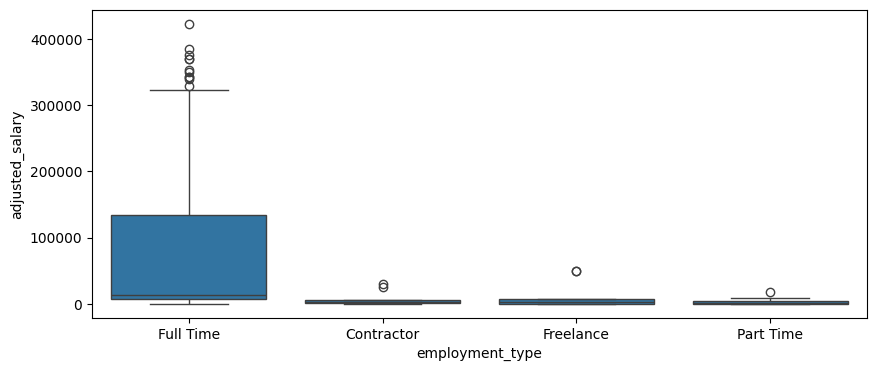

In [46]:
plt.figure(figsize=(10,4))

sns.boxplot(data=data, x='employment_type', y='adjusted_salary')

plt.show()

## 1.9 Distribution of Salary

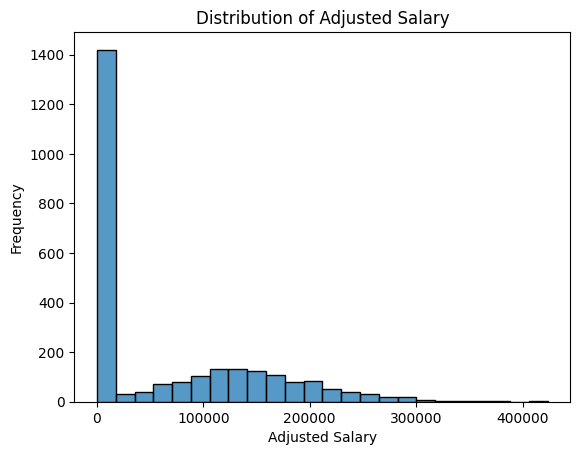

In [47]:
sns.histplot(data['adjusted_salary'])

plt.title('Distribution of Adjusted Salary')
plt.ylabel('Frequency')
plt.xlabel('Adjusted Salary')
plt.show()

## 1.10 Boxplot and Swarmplot of Adjusted Salary

<ipython-input-28-39ea39a780ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['adjusted_salary'], palette='coolwarm')


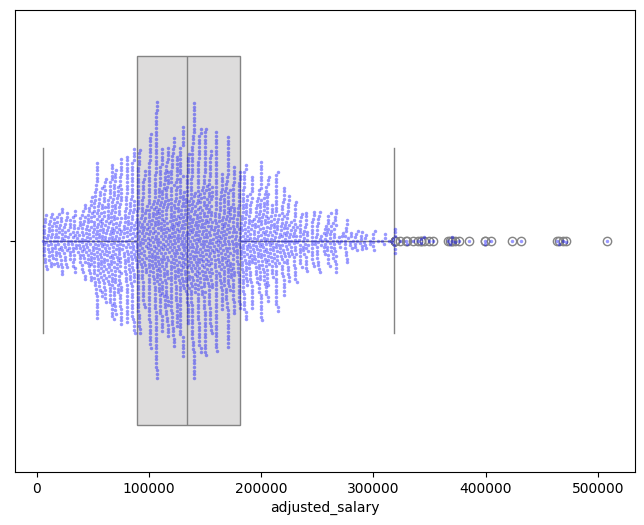

In [ ]:
plt.figure(figsize=(8,6))

sns.boxplot(x=data['adjusted_salary'], palette='coolwarm')
sns.swarmplot(x=data['adjusted_salary'], color='blue', alpha=0.4, size=2.5)

plt.show()

In [ ]:
data['adjusted_salary'].describe()

count      2584.000000
mean     138560.259727
std       69092.951905
min        5583.616000
25%       89460.000000
50%      134318.173494
75%      181050.000000
max      507946.579425
Name: adjusted_salary, dtype: float64

# 2. Answer These Questions
- Show the **median** adjusted data scientist salary, for each experience level
- Show the number of records for each company_location, sorted descending
- From this data, show the **median** adjusted salary of employee who works for company located in Indonesia (ID), do you think that value represents the salary in Indonesia? why? why not?

In [48]:
# Show the median adjusted data scientist salary, for each experience level

#answer
df_filtered = data[data['job_title'].str.contains('Data Scientist')]
df_pivot = pd.pivot_table(df_filtered, values=['adjusted_salary'], index=['experience_level'], aggfunc = {'adjusted_salary':['median']})
print('Median Adjusted Data Scientist Salary')
df_pivot

Median Adjusted Data Scientist Salary


,adjusted_salary
,median
experience_level,
Entry Level,4795.050
Executive Level,145000.000
Intermediate Level,7150.000
Senior,15280.846


**Answer:**
Insight

1. Terdapat perbedaan gaji yang signifikan antara level-level berbeda dalam pekerjaan Data Scientist (berdasarkan job_title).

2. Gaji median untuk Executive Level adalah yang tertinggi, yaitu $185.000. Ini kemungkinan menunjukkan bahwa pengalaman dan level tanggung jawab pada jabatan yang lebih tinggi memiliki dampak pada kompensasi.

3. Gaji median untuk Entry Level adalah $73.265,34, yang lebih rendah dari gaji pada level Intermediate dan Senior. Ini memperkuat bahwa pengalaman dan tanggung jawab yang lebih tinggi biasanya dihargai dengan gaji yang lebih tinggi.

4. Perbedaan besar dalam gaji antar level dapat mengindikasikan pentingnya pengalaman dan tingkat keahlian dalam menentukan kompensasi dalam pekerjaan Data Scientist. Dengan kata lain, melihat perbedaan gaji antar level juga dapat memberikan wawasan tentang peluang pengembangan karir dan keuntungan finansial yang mungkin diperoleh dengan naik ke level yang lebih tinggi. teks yang dimiringkan

In [ ]:
# Show the number of records for each company_location, sorted descending

#answer
df_country_counts = data.loc[:,['company_location']].value_counts(ascending=False)
pd.set_option('display.max_rows', None)
df_country_counts

company_location
US                  1929
GB                   155
CA                    83
IN                    57
DE                    55
ES                    44
FR                    33
BR                    15
PT                    14
AU                    14
NL                    13
GR                    11
MX                    10
IE                     7
SG                     6
AT                     6
JP                     6
CH                     5
PL                     5
TR                     5
NG                     5
LV                     4
PR                     4
DK                     4
PK                     4
CO                     4
SI                     4
BE                     4
UA                     4
IT                     4
RU                     3
LU                     3
TH                     3
AE                     3
AR                     3
AS                     3
HR                     3
CZ                     3
FI                     3
HU      

**Answer**
Insight
1. Terdapat perbedaan yang signifikan dalam jumlah perusahaan di lokasi berbeda. Misalnya, AS (Amerika Serikat) memiliki jumlah perusahaan yang jauh lebih banyak (1929) daripada negara lainnya.

2. Jumlah perusahaan yang banyak ini, dapat mengindikasikan potensi pasar yang besar di wilayah tersebut. AS, dengan jumlah perusahaan terbanyak, mungkin memiliki ekosistem startup dan teknologi yang kuat, serta pasar kerja yang kompetitif di industri digital.

In [ ]:
# From this data, show the median adjusted salary of employee who works for company located in Indonesia (ID),
# do you think that value represents the salary in Indonesia? why? why not?

#answer
df_filtered1 = data[data['company_location'].str.contains('ID')]
df_pivot1 = pd.pivot_table(df_filtered1, values=['adjusted_salary'], index=['company_location'], aggfunc = {'adjusted_salary':['median']})
print('Median Salary of Company Located in Indonesia')
df_pivot1


Median Salary of Company Located in Indonesia


,adjusted_salary
,median
company_location,
ID,37045.804


**Answer**
Insight
Nilai dari median salary di Indonesia pada data tersebut tidak merepresentasikan nilai sebenarnya di lapangan. Kenapa? karena berdasarkan data yang dirilis oleh BBC Indonesia, median gaji pekerja di Indonesia berada di angak Rp11.400.000,00. Sementara data median di atas (dalam dolar) jika dikonversi ke rupiah menjadi Rp575.028.100,00, hampir 60 kali lipat dari data sebenarnya sehingga tidak representatif.